In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

In [3]:
class Perceptron:
    def __init__(self,eta:float = None, epochs: int = None):
        self.weights = np.random.randn(3) * 1e-4 # small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"Initial weights Before training:\n{self.weights}")
        self.eta = eta 
        self.epochs = epochs
    
    def _z_outcome(self,inputs,weights):
        return np.dot(inputs,weights)
        

    def activation_function(self,z):
        return np.where(z>0,1,0)

    def fit(self,x,y):
        self.x = x
        self.y = y 
        x_with_bias = np.c_[self.x ,-np.ones((len(self.x), 1))]
        print("X with BIAS ==",x_with_bias)

        for epoch in range(self.epochs):
            print("#"*10)
            print(f"for epoch >>{epoch}")
            print("#"*15)
            z = self._z_outcome(x_with_bias,self.weights)
            y_hat = self.activation_function(z)
            print(f"Y HAT VALUE:{y_hat}")

            self.error = self.y - y_hat
            print(f"Error:\n{self.error}")  

            self.weights = self.weights + self.eta * np.dot(x_with_bias.T,self.error)
            print(f"Updated weihgts after epoch {epoch}/{self.epochs}:{self.weights}")
            print("--"*10)

    def predict(self,x):
        x_with_bias = np.c_[x ,-np.ones((len(x), 1))]
        z = self._z_outcome(x_with_bias,self.weights)
        return self.activation_function(z)

    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"TITAL LOSS:{total_loss}")
        return total_loss

    def _create_dir_return_path(self,model_dir,filename):
        os.makedirs(model_dir,exist_ok=True)
        return os.path.join(model_dir,filename)

    def save(self,filename,model_dir = None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir,filename)
            joblib.dump(self,model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model",filename)
            joblib.dump(self,model_file_path)

    def load_model(self,filepath):
        return joblib.load(filepath)



In [4]:
def prepare_dataset(df,y):
    y_data = df[y]
    x_data = df.drop(y,axis=1)
    return x_data,y_data
# x = df.iloc[:3,0:2]
# y = df.y

In [5]:
AND = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,0,0,1]
}

df = pd.DataFrame(AND)
x,y= prepare_dataset(df,"y")
ETA = 0.1
EPOCHS = 10
model_and = Perceptron(eta = ETA,epochs=EPOCHS)
model_and.fit(x,y)
total_loss = model_and.total_loss()
# print(x)
# print("\n")
# print(y)

Initial weights Before training:
[ 7.34769225e-05 -4.04817170e-05  1.20188493e-04]
X with BIAS == [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
##########
for epoch >>0
###############
Y HAT VALUE:[0 0 0 0]
Error:
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weihgts after epoch 0/10:[ 0.10007348  0.09995952 -0.09987981]
--------------------
##########
for epoch >>1
###############
Y HAT VALUE:[1 1 1 1]
Error:
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weihgts after epoch 1/10:[ 7.34769225e-05 -4.04817170e-05  2.00120188e-01]
--------------------
##########
for epoch >>2
###############
Y HAT VALUE:[0 0 0 0]
Error:
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weihgts after epoch 2/10:[0.10007348 0.09995952 0.10012019]
--------------------
##########
for epoch >>3
###############
Y HAT VALUE:[0 0 0 1]
Error:
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weihgts after epoch 3/10:[0.10007348 0.09995952 0.10012019]
--------

In [6]:
AND_predict = {
    'x1':[1],
    'x2':[0]
} 
and_pre = pd.DataFrame(AND_predict)
model_and.predict(and_pre)

array([0])

In [23]:
OR_train = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,1,1,1]
}

In [24]:
df_or = pd.DataFrame(OR_train)

In [9]:
x,y = prepare_dataset(df,"y")

In [10]:
ETA = 0.1
EPOCHS = 10
or_model = Perceptron(eta=ETA,epochs=EPOCHS)
or_model.fit(x,y)
tot_loss = or_model.total_loss()
print("TOTALL LOSSS",tot_loss)

Initial weights Before training:
[ 8.46170374e-05 -2.06679221e-04 -9.19852648e-05]
X with BIAS == [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
##########
for epoch >>0
###############
Y HAT VALUE:[1 0 1 0]
Error:
0   -1
1    1
2    0
3    1
Name: y, dtype: int64
Updated weihgts after epoch 0/10:[ 0.10008462  0.19979332 -0.10009199]
--------------------
##########
for epoch >>1
###############
Y HAT VALUE:[1 1 1 1]
Error:
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weihgts after epoch 1/10:[ 1.00084617e-01  1.99793321e-01 -9.19852648e-05]
--------------------
##########
for epoch >>2
###############
Y HAT VALUE:[1 1 1 1]
Error:
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weihgts after epoch 2/10:[0.10008462 0.19979332 0.09990801]
--------------------
##########
for epoch >>3
###############
Y HAT VALUE:[0 1 1 1]
Error:
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weihgts after epoch 3/10:[0.10008462 0.19979332 0.09990801]
--------

In [11]:
or_predict = {
    'x1':[1],
    'x2':[0]
} 
and_pre = pd.DataFrame(or_predict)
or_model.predict(and_pre)

array([1])

In [12]:
model_and.save(filename="and.model")

In [13]:
reload_percep = Perceptron().load_model(filepath = "model/and.model")

In [14]:
reload_percep.predict(and_pre)

array([0])

In [15]:
model_and.save(filename="or.model")

In [16]:
reload_percep_or = Perceptron().load_model(filepath = "model/and.model")

In [17]:
reload_percep_or.predict(and_pre)

array([0])

In [49]:
def save_plot(df,model,filename = "plot.png"):
    def _create_base_plot(df):
        df.plot(kind = "scatter",x= "x1",y= "x2",c = "y",s=100,cmap = "coolwarm")
        plt.axhline(y=0,color = "black",linestyle = "--",linewidth = 1)
        plt.axvline(x=0,color = "black",linestyle = "--",linewidth = 1)
        figure=plt.gcf()
        figure.set_size_inches(10,8)

    def _plot_decision_regions(x,y,classifier,resolution=0.02):
        colors = ('cyan','lightgreen')
        cmap = ListedColormap(colors)
        x = x.values
        x1 = x[:,0]
        x2 = x[:,1]
        x1_min,x1_max = x1.min() - 1,x1.max()+1
        x2_min,x2_max = x2.min() - 1,x2.max()+1
        xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                            np.arange(x2_min,x2_max,resolution))

        y_hat = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)

        plt.contour(xx1,xx2,y_hat,alpha = 0.3,cmap  = cmap)
        plt.xlim(xx1.min(),xx1.max())
        plt.ylim(xx1.min(),xx1.max())
        plt.plot()

    x,y = prepare_dataset(df,"y")
    _create_base_plot(df)
    _plot_decision_regions(x,y,model)
    plot_dir = "plots"
    os.makedirs(plot_dir,exist_ok=True)
    plot_path = os.path.join(plot_dir,filename) 
    plt.savefig(plot_path)

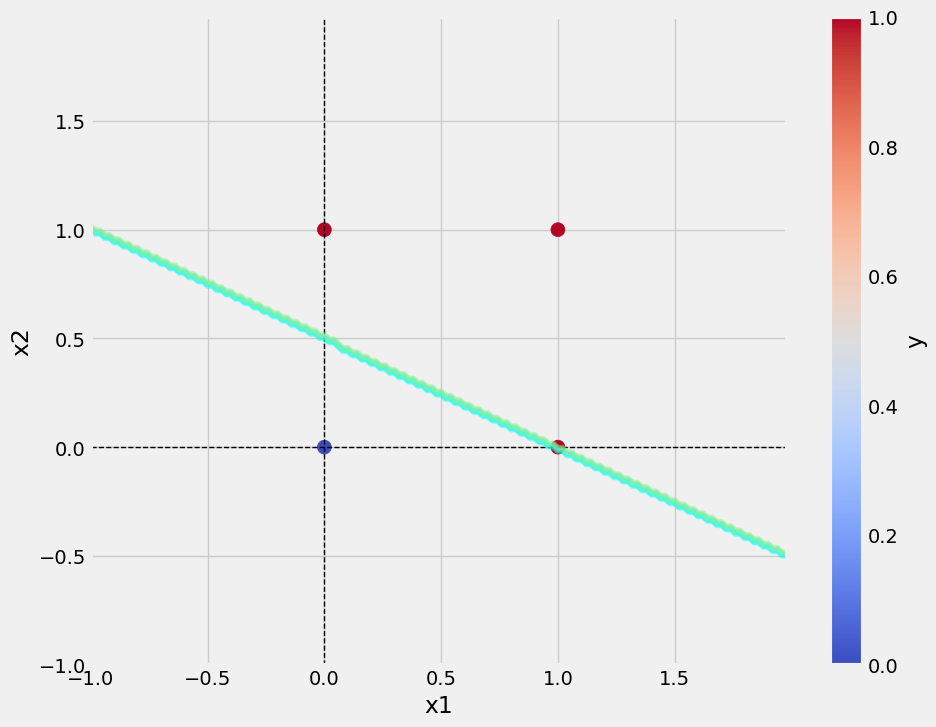

In [50]:
save_plot(df_or,or_model,filename = "plot.png")

In [26]:
df_or

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1
